## Weather Analysis

I recently moved with my wife and kids from Nottingham to Minehead in Somerset. Since we moved, the weather hasn't been great, Minehead is coastal so can get quite stormy and it's just been a bit miserable. In passing to my wife, I mentioned that it's just rainier and warmer than in Derby, she disagreed and said it doesn't rain more, but is warmer. So there's only way to resolve such a disagreement - with data!

The UK Metoffice release all sorts of weather and climate data, but I downloaded data from two indidual weather stations - one at Chivenor Army base near Taunton, Somerset and the other in Sutton Bonington, at the University Campus where I did my PhD. 

I then used pandas and matplotlib to analyse and graph the data. 

First, I loaded the required libraries, we need pandas and numpy to manipulate the data and matplotlib for graphing. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Next, we can load our first dataset into a DataFrame, then rename the columns to more helpful names

In [2]:
chivenor = pd.read_excel('chivenordata.xlsx')
chivenor.rename(columns={'yyyy':'Year', 'mm':'Month', 'tmax':'TempMax', 'tmin':'TempMin', 'af':'AF', 'rain':'Rain (mm)', 'sun':'Sun (Hours)'}, inplace=True)

Next, we can use pandas to_datetime to set our Date column, and then set our numeric columns so we can graph the data. 

In [3]:
chivenor['Date'] = pd.to_datetime(chivenor[['Year', 'Month']].assign(DAY=1))
chivenor['TempMax'] = pd.to_numeric(chivenor['TempMax'])
chivenor['Rain (mm)'] = pd.to_numeric(chivenor['Rain (mm)'])
chivenor['Sun (Hours)'] = pd.to_numeric(chivenor['Sun (Hours)'])

Then, we can set our index column to our date field, then remove the columns we don't need. Any blank measurements in the dataset are shown by "---" so to make things easier, we can replace these with NaN values. 

In [4]:
chivenor.index = chivenor['Date']
chivenor = chivenor.drop(['AF', 'Unnamed: 7', 'Date'], axis=1)
chivenor = chivenor.replace(to_replace='---', value=np.nan)

We can then apply the same processing to our data for Sutton Bonington

In [5]:
sutbon = pd.read_excel('suttonbonington.xlsx')
sutbon.rename(columns={'yyyy':'Year', 'mm':'Month', 'tmax':'TempMax', 'tmin':'TempMin', 'af':'AF', 'rain':'Rain (mm)', 'sun':'Sun (Hours)'}, inplace=True)

sutbon['Date'] = pd.to_datetime(sutbon[['Year', 'Month']].assign(DAY=1))
sutbon['TempMax'] = pd.to_numeric(sutbon['TempMax'])
sutbon['Rain (mm)'] = pd.to_numeric(sutbon['Rain (mm)'])
sutbon['Sun (Hours)'] = pd.to_numeric(sutbon['Sun (Hours)'])

sutbon.index = sutbon['Date']
sutbon = sutbon.drop(['AF', 'Date', 'Unnamed: 7', 'Unnamed: 8'], axis=1)
sutbon = sutbon.replace(to_replace='---', value=np.nan)

I can then just check the head of each DataFrame and check the data looks as expected. 

In [6]:
sutbon.head()

,Year,Month,TempMax,TempMin,Rain (mm),Sun (Hours)
Date,,,,,,
1959-01-01,1959,1,4.2,-2.4,NaN,78.8
1959-02-01,1959,2,7.0,0.9,NaN,54.0
1959-03-01,1959,3,10.7,3.2,NaN,80.7
1959-04-01,1959,4,13.8,5.1,NaN,148.1
1959-05-01,1959,5,17.6,6.1,NaN,206.7


In [7]:
chivenor.head()

,Year,Month,TempMax,TempMin,Rain (mm),Sun (Hours)
Date,,,,,,
1951-01-01,1951,1,7.9,3.9,106.2,48.2
1951-02-01,1951,2,8.3,2.8,96.3,105.2
1951-03-01,1951,3,8.6,3.5,102.1,104.9
1951-04-01,1951,4,11.4,4.2,94.2,225.1
1951-05-01,1951,5,14.1,7.0,59.9,198.7


The data look good now, althou there are clearly some missing values (now shown by NaN) so can try drawing some graphs! For a quick check of the data, we can draw a scatter plot for the rainfall at each weather station. 

[Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Monthly precipitation at Sutton Bonington')]

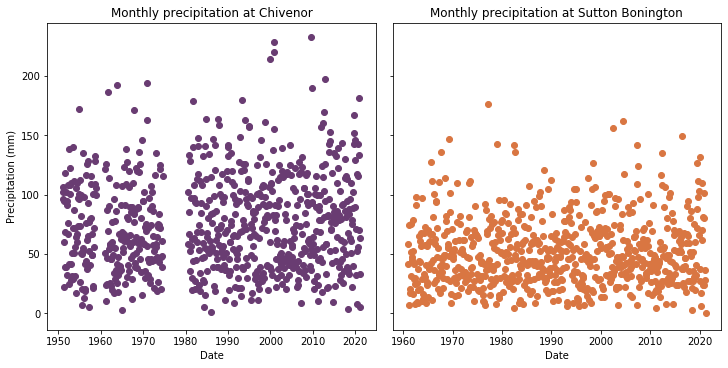

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(10, 5))
ax1.scatter(chivenor.index,
           chivenor['Rain (mm)'],
           color='#693C72')
ax1.set(xlabel="Date",
       ylabel="Precipitation (mm)",
       title="Monthly precipitation at Chivenor")
       
ax2.scatter(sutbon.index,
            sutbon['Rain (mm)'],
             color='#D97642') 
             
ax2.set(xlabel="Date",
        title="Monthly precipitation at Sutton Bonington")

Obviously there's a lot of data there, and it's quite variable. The other thing to note is that there is some missing data, there is a period of time for Chivenor where there is no precipitation data. That shouldn't matter for this analysis though. 

Next, we can draw a similar scatterplot for the temperature data.

[Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Monthly Maximum Temperature at Sutton Bonington')]

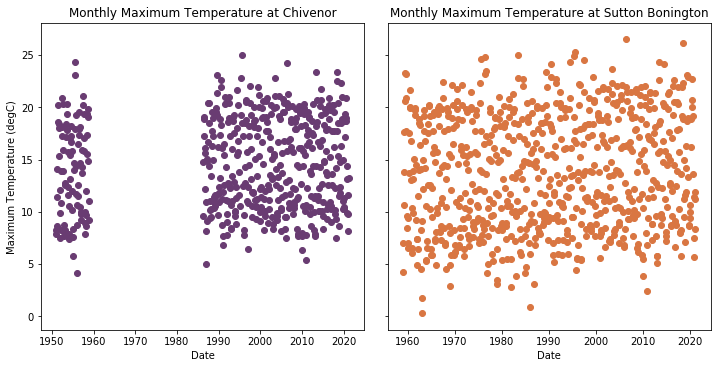

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(10, 5))
ax1.scatter(chivenor.index,
           chivenor['TempMax'],
           color='#693C72')
ax1.set(xlabel="Date",
       ylabel="Maximum Temperature (degC)",
       title="Monthly Maximum Temperature at Chivenor")
       
ax2.scatter(sutbon.index,
            sutbon['TempMax'],
             color='#D97642') 
             
ax2.set(xlabel="Date",
        title="Monthly Maximum Temperature at Sutton Bonington")

As you can see, there is an even bigger gap in the data at Chivenor data. I'm not sure why there is a nearly 30 year gap in the data, but never mind. 

It's all well and good looking at the invidual data, but to answer the question I'm actually interested in - is it warmer and wetter in Somerset than in Nottingham?

Let's start with the rainfall data. For this, I can take a mean value for each month across all the years, using GroupBy.  

In [10]:
#calculate means and standard deviations
meanCR = chivenor.groupby(chivenor.Month).mean()['Rain (mm)']
stdevCR = chivenor.groupby(chivenor.Month).std()['Rain (mm)']
meanSR = sutbon.groupby(sutbon.Month).mean()['Rain (mm)']
stdevSR = sutbon.groupby(sutbon.Month).mean()['Rain (mm)']

We can then go ahead and plot the graph of rainfall data

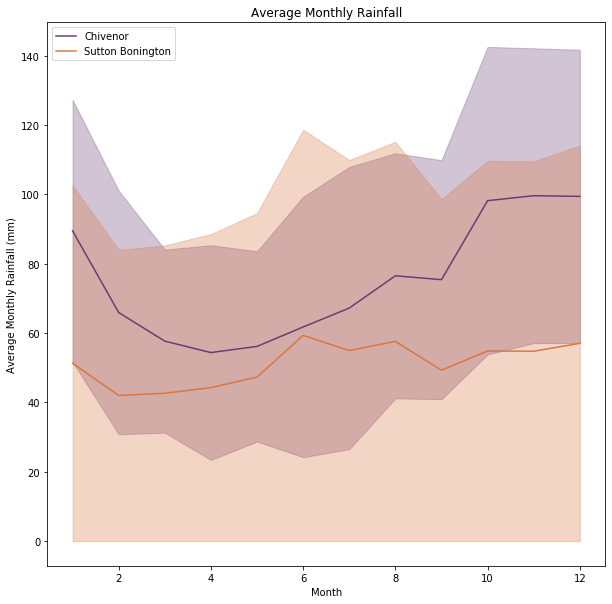

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# plot the line for Chivenor
ax.plot(chivenor.groupby(chivenor.Month).mean().index,
           meanCR,
           color='#693C72')

#add the shaded region to show standard deviations
ax.fill_between(chivenor.groupby(chivenor.Month).mean().index, meanCR+stdevCR, meanCR-stdevCR, alpha=0.3, color='#693C72')

# plot the line for Sutton Bonington
ax.plot(sutbon.groupby(sutbon.Month).mean().index,
       meanSR, 
       color='#D97642')

#Sutton Bonington standard deviations
ax.fill_between(sutbon.groupby(sutbon.Month).mean().index, meanSR+stdevSR, meanSR-stdevSR, alpha=0.3, color='#D97642')

#set the axis labels and chart title
ax.set(xlabel='Month',
      ylabel='Average Monthly Rainfall (mm)',
      title='Average Monthly Rainfall')

#add a legend to show which line is which weather station 
ax.legend(('Chivenor', 'Sutton Bonington'), loc='upper left', shadow=False)

#draw the graph
plt.show()

The first thing that struck me about this data is that the standard deviations (representing the year-to-year variation) are huge!

But notably, the means for Chivenor are higher across the whole year than Sutton Bonington - supporting my claim that it rains more in Somerset!

Next up - temperature.

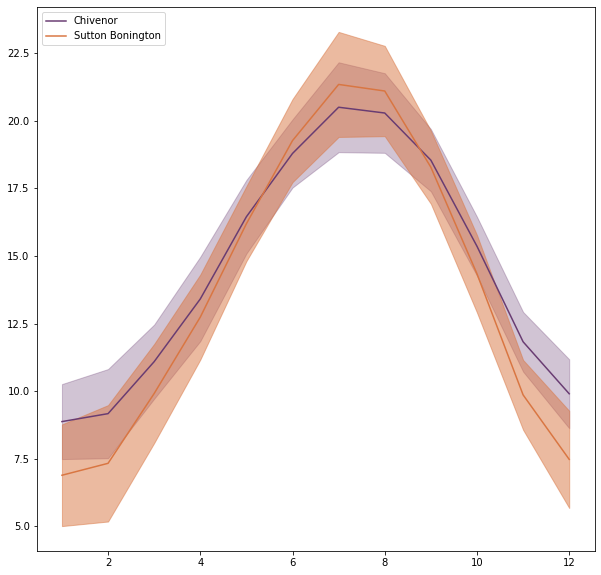

In [12]:
meanCT = chivenor.groupby(chivenor.Month).mean()['TempMax']
stdevCT = chivenor.groupby(chivenor.Month).std()['TempMax']
meanST = sutbon.groupby(sutbon.Month).mean()['TempMax']
stdevST = sutbon.groupby(sutbon.Month).std()['TempMax']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(chivenor.groupby(chivenor.Month).mean().index,
           meanCT,
           color='#693C72')

ax.fill_between(chivenor.groupby(chivenor.Month).mean().index, meanCT+stdevCT, meanCT-stdevCT, alpha=0.3, color='#693C72')

ax.plot(sutbon.groupby(sutbon.Month).mean().index,
       meanST, 
       color='#D97642')

ax.fill_between(sutbon.groupby(sutbon.Month).mean().index, meanST+stdevST, meanST-stdevST, alpha=0.5, color='#D97642')

ax.legend(('Chivenor', 'Sutton Bonington'), loc='upper left', shadow=False)

There are a couple of interesting things here. First, the variation is much smaller for temperature than for rainfall. Next, there's not much difference between the overall annual temperature at the two weather stations. Sutton Bonington is colder in the winter, and surprisingly, maybe a little warmer in the summer. It's worth noting that the measure here is maximum temperature in each month, not average temperature, I'm not sure how much difference that makes though.

There's one element of the data that we haven't looked at yet that might be interesting, and that's hours of sunlight. If Somerset is rainier, we would probably expect fewer hours of sun. 

So to start with, we can just graph a scatterplot of the data.

[Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Monthly hours of sun at Sutton Bonington')]

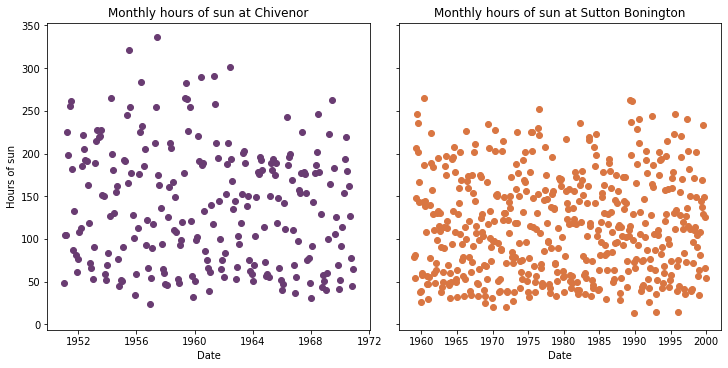

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize=(10, 5))
ax1.scatter(chivenor.index,
           chivenor['Sun (Hours)'],
           color='#693C72')
ax1.set(xlabel="Date",
       ylabel="Hours of sun",
       title="Monthly hours of sun at Chivenor")
       
ax2.scatter(sutbon.index,
            sutbon['Sun (Hours)'],
             color='#D97642') 
             
ax2.set(xlabel="Date",
        title="Monthly hours of sun at Sutton Bonington")

That looks fine, no big gaps in the data. So we can go ahead and graph the monthly means.

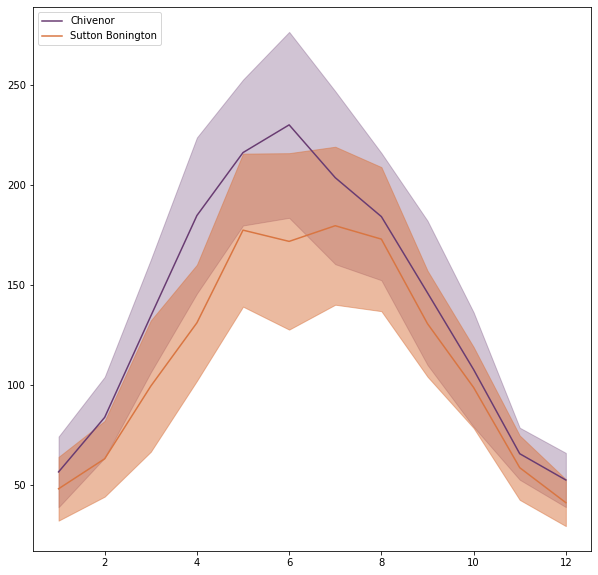

In [14]:
meanCS = chivenor.groupby(chivenor.Month).mean()['Sun (Hours)']
stdevCS = chivenor.groupby(chivenor.Month).std()['Sun (Hours)']
meanSS = sutbon.groupby(sutbon.Month).mean()['Sun (Hours)']
stdevSS = sutbon.groupby(sutbon.Month).std()['Sun (Hours)']

# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(chivenor.groupby(chivenor.Month).mean().index,
           meanCS,
           color='#693C72')

ax.fill_between(chivenor.groupby(chivenor.Month).mean().index, meanCS+stdevCS, meanCS-stdevCS, alpha=0.3, color='#693C72')

ax.plot(sutbon.groupby(sutbon.Month).mean().index,
       meanSS, 
       color='#D97642')

ax.fill_between(sutbon.groupby(sutbon.Month).mean().index, meanSS+stdevSS, meanSS-stdevSS, alpha=0.5, color='#D97642')

ax.legend(('Chivenor', 'Sutton Bonington'), loc='upper left', shadow=False)

Again, this surprised me a little, but it seems that Chivenor gets more hours of sun than Sutton Bonington all year round. It is further south of course, so that might be part of this.

In conclusion, I went into this anlysis trying to see if my thought that Minehead was warmer and wetter than Nottingham was true, or whether my wife's feeling that it is warmer but not wetter. Well it turns out that we were both wrong - based on the weather station data, it seems that Minehead (well Chivenor as a proxy) is wetter, a little warmer in the winter and cooler in the summer and on a positive note, has more hours of sun all year round. 

All in all, a fun way to analyse some weather data!



